<a href="https://colab.research.google.com/github/EryckNoronha/ProjetoGit/blob/main/1_Deliverable_King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [3]:
df = pd.read_csv('/content/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#criando uma nova coluna com as coordenadas
lat_and_long = []

for la, lo in zip(df['lat'],df['long']):
  la = str(la)
  lo = str(lo)
  lat_and_long = la + ',' + lo

df['lat_and_long'] = lat_and_long

In [15]:
df['Contagem_repetidos'] = df['id'].value_counts()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_and_long,Contagem_repetidos
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,"47.5941,-122.299",NaN
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,"47.5941,-122.299",NaN
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,"47.5941,-122.299",NaN
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,"47.5941,-122.299",NaN
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,"47.5941,-122.299",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,"47.5941,-122.299",NaN
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,"47.5941,-122.299",NaN
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,"47.5941,-122.299",NaN
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,"47.5941,-122.299",NaN


In [5]:
#apagando as colunas separadas
df.drop('lat',axis=1,inplace=True)
df.drop('long',axis=1,inplace=True)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
lat_and_long     0
dtype: int64

In [7]:
df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'lat_and_long'],
      dtype=object)

In [10]:
pd.set_option('float_format', '{:.2f}'.format)
df['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [16]:
df[['grade','condition']]

,grade,condition
count,21613.00,21613.00
mean,7.66,3.41
std,1.18,0.65
min,1.00,1.00
25%,7.00,3.00
50%,7.00,3.00
75%,8.00,4.00
max,13.00,5.00


In [11]:
selecaoColunas1 = ['id','date','price', 'sqft_lot','condition', 'grade', 'lat_and_long']

In [12]:
dadosSelecionados = df.filter(items=selecaoColunas1)
dadosSelecionados.head()

,id,date,price,sqft_lot,condition,grade,lat_and_long
0,7129300520,20141013T000000,221900.00,5650,3,7,"47.5941,-122.299"
1,6414100192,20141209T000000,538000.00,7242,3,7,"47.5941,-122.299"
2,5631500400,20150225T000000,180000.00,10000,3,6,"47.5941,-122.299"
3,2487200875,20141209T000000,604000.00,5000,5,7,"47.5941,-122.299"
4,1954400510,20150218T000000,510000.00,8080,3,8,"47.5941,-122.299"


In [13]:
dadosSelecionados['date'] = pd.to_datetime(dadosSelecionados['date'])
dadosSelecionados.head()

,id,date,price,sqft_lot,condition,grade,lat_and_long
0,7129300520,2014-10-13,221900.00,5650,3,7,"47.5941,-122.299"
1,6414100192,2014-12-09,538000.00,7242,3,7,"47.5941,-122.299"
2,5631500400,2015-02-25,180000.00,10000,3,6,"47.5941,-122.299"
3,2487200875,2014-12-09,604000.00,5000,5,7,"47.5941,-122.299"
4,1954400510,2015-02-18,510000.00,8080,3,8,"47.5941,-122.299"


In [17]:
precoArea = []

for p, s in zip(df['price'],df['sqft_living']):
    x = p/s
    precoArea.append(x)

dadosSelecionados['price_per_area'] = precoArea
dadosSelecionados.head()

,id,date,price,sqft_lot,condition,grade,lat_and_long,price_per_area
0,7129300520,2014-10-13,221900.00,5650,3,7,"47.5941,-122.299",188.05
1,6414100192,2014-12-09,538000.00,7242,3,7,"47.5941,-122.299",209.34
2,5631500400,2015-02-25,180000.00,10000,3,6,"47.5941,-122.299",233.77
3,2487200875,2014-12-09,604000.00,5000,5,7,"47.5941,-122.299",308.16
4,1954400510,2015-02-18,510000.00,8080,3,8,"47.5941,-122.299",303.57


In [18]:
dadosSelecionados['price_per_area'].describe()

count   21613.00
mean      264.16
std       110.06
min        87.59
25%       182.29
50%       244.64
75%       318.32
max       810.14
Name: price_per_area, dtype: float64

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
#teste de localização
locator = Nominatim(user_agent='myGeocode') #variavel para localização do myGeocode
localizacao = locator.geocode('47.5112,-122.257')
localizacao.address

'10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States'

In [ ]:
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
geocodigo = RateLimiter(locator.geocode,min_delay_seconds=1) #este codigo da um delei de um segundo

df['address'] = df['lat_and_long'].apply(geocodigo) #criando nova coluna com indereços


## 1- Verificação das colunas. 
Analisando os nomes e se contem tipos das colunas diferentes dos valores preenchidos.

In [19]:
df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'lat_and_long'],
      dtype=object)

In [20]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
lat_and_long      object
dtype: object

Resumo da estatisca do Data Frame

In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,6210.00,871200.00


Verificando valores NAN no Data Frame

Quantidade de casas e andares

In [23]:
df['floors'].value_counts().to_frame()

,floors
1.00,10680
2.00,8241
1.50,1910
3.00,613
2.50,161
3.50,8


In [24]:
df['id'].value_counts().to_frame()

,id
795000620,3
8651510380,2
2568300045,2
9353300600,2
4139480200,2
...,...
2767603649,1
1446403617,1
5602000275,1
1786200010,1


Recurso diferente do preço que está mais correlacionado com o preço.

In [25]:
df.corr()['price'].sort_values()

zipcode         -0.05
id              -0.02
condition        0.04
yr_built         0.05
sqft_lot15       0.08
sqft_lot         0.09
yr_renovated     0.13
floors           0.26
waterfront       0.27
bedrooms         0.31
sqft_basement    0.32
view             0.40
bathrooms        0.53
sqft_living15    0.59
sqft_above       0.61
grade            0.67
sqft_living      0.70
price            1.00
Name: price, dtype: float64

Verificando relação do preço e tamanho do terreno

In [26]:
X = df[['sqft_lot']] #tamanho do terreno
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
regrecaoLinear1 = lm.score(X, Y) * 100
print(f'{regrecaoLinear1:.2f}%')

0.80%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Podemos observar que a área está possivelmente relacionada com o preço


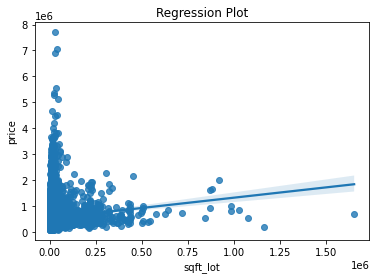

In [28]:
sns.regplot(df['sqft_lot'], df['price'])
plt.title("Regression Plot")
print("Podemos observar que a área está possivelmente relacionada com o preço")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Podemos observar que a área está possivelmente relacionada com o preço


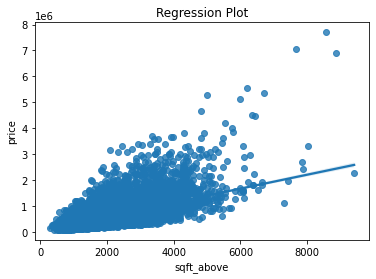

In [29]:
sns.regplot(df['sqft_above'], df['price'])
plt.title("Regression Plot")
print("Podemos observar que a área está possivelmente relacionada com o preço")

Regressão linear para comparação do 'preço' e a metragem quadrada da casa ('sqft_living') 

In [30]:
X = df[['sqft_living']]
Y = df['price']

lm1 = LinearRegression()
lm1.fit(X, Y)
regrecaoLinear2 = lm1.score(X, Y)


print("Os valores previstos são : " + str(lm1.predict(X)))

print(f"O coeficiente de determinação R^2 :{lm1.score(X, Y)*100:.2f} %")

Os valores previstos são : [287555.06702451 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]
O coeficiente de determinação R^2 :49.29 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Regression Plot')

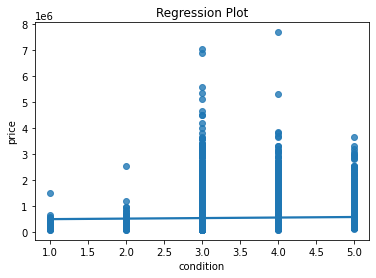

In [32]:
sns.regplot(df['condition'], df['price'])
plt.title("Regression Plot")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Podemos observar existe uma grande relação do preço e a metragem quadrada da casa


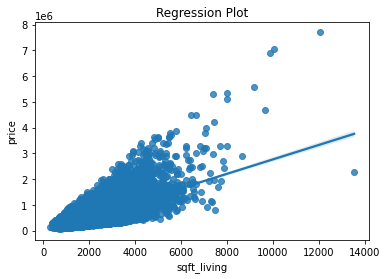

In [31]:
sns.regplot(df['sqft_living'], df['price'])
plt.title("Regression Plot")
print("Podemos observar existe uma grande relação do preço e a metragem quadrada da casa");

Modelo de regressão linear para prever o 'preço' usando a lista de recursos:

In [33]:
recursos = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 

In [35]:
Y = df['price']
lm2 = LinearRegression()
lm2.fit(df[recursos], Y)

print("Os valores previstos são mencionados como : " + str(lm2.predict(df[recursos])))

print("O coeficiente de determinação é : " + str(lm2.score(df[recursos], Y)*100) )

KeyError: ignored

Determinar se as casas com vista para o mar ou sem vista para o mar têm mais valores discrepantes.

In [36]:
df['waterfront'].value_counts(dropna=False)

0    21450
1      163
Name: waterfront, dtype: int64

In [37]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [38]:
colunas_selecionadas = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long']

In [ ]:
selecao_df = df.filter(items=colunas_selecionadas)